In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import display
import pandas as pd
import numpy as np

## Step1

In [2]:
money = float(input("請輸入您的戶頭金額: "))
print("若以臺灣銀行一年期定存利率1.065%計算, 一年後您將獲得:",money*0.01065,"元")

請輸入您的戶頭金額: 1234567
若以臺灣銀行一年期定存利率1.065%計算, 一年後您將獲得: 13148.13855 元


In [3]:
I = money*0.01065 #I即為利息
print(I)

13148.13855


## Step2

## [參考資料：如何爬選擇權即時報價](http://yvictor.logdown.com/posts/996770)

In [4]:
driver = webdriver.PhantomJS()

In [5]:
#若直接抓取選擇權頁面的資料不知道為什麼會被期交所擋住，所以先抓期交所裡面的其他資料，在這之後再抓選擇權資料，並且把這行覆蓋掉。
driver.get('http://info512.taifex.com.tw/Future/FusaQuote_Norl.aspx')

In [6]:
#若直接抓取選擇權頁面的資料不知道為什麼會被期交所擋住，所以先抓期交所裡面的其他資料，在這之後再抓選擇權資料，並且把這行覆蓋掉。
soup = BeautifulSoup(driver.page_source,'lxml')
A = pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[8:20]
#把NA改成0啦!!
A.fillna(0)
#把--改成0啦!!
A.replace('--',0)

,商品,狀態,買價,買量,賣價,賣量,成交價,漲跌,振幅％,成交量,開盤,最高,最低,參考價,時間
8,金融期028,收盤,1215.60,2,1216.60,3,1215.80,9.00,0.73,89,1208.00,1216.40,1207.60,1206.80,13:39:09
9,金融期038,收盤,1213.80,1,1216.80,1,1215.40,8.60,0.03,2,1215.80,1215.80,1215.40,1206.80,13:29:19
10,金融期068,收盤,1192.00,2,1216.60,1,0,0,0,0,NaN,NaN,NaN,1198.60,NaN
11,金融期098,收盤,1180.20,1,1191.80,1,1190.20,20.60,0.00,1,1190.20,1190.20,1190.20,1169.60,12:36:48
12,電子現貨,收盤,NaN,0,NaN,0,453.53,0.68,0.74,0,453.34,453.83,450.46,452.85,13:31:09
13,電子期018,收盤,453.00,7,453.30,1,453.00,0.85,0.83,4428,451.95,453.75,450.00,452.15,13:44:58
14,電子期028,收盤,452.35,7,452.75,3,452.70,1.15,0.74,65,451.30,452.80,449.45,451.55,13:41:19
15,電子期038,收盤,451.50,2,455.35,2,452.00,1.05,0.00,1,452.00,452.00,452.00,450.95,11:34:17
16,電子期068,收盤,447.45,1,450.80,1,0,0,0,0,NaN,NaN,NaN,448.20,NaN
17,電子期098,收盤,431.80,1,439.20,1,0,0,0,0,NaN,NaN,NaN,434.05,NaN


In [7]:
driver.get('http://info512.taifex.com.tw/Future/OptQuote_Norl.aspx')

In [8]:
selectbox = webdriver.support.ui.Select(driver.find_element_by_name('ctl00$ContentPlaceHolder1$ddlFusa_SelMon'))
selectbox.all_selected_options
[sel.text for sel in selectbox.options]
selectbox.select_by_value([sel.text for sel in selectbox.options][1])

In [9]:
soup = BeautifulSoup(driver.page_source,'lxml')
pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[8:20]

,買進,賣出,成交,漲跌,總量,時間,履約價,買進.1,賣出.1,成交.1,漲跌.1,總量.1,時間.1
8,200.0,325.0,321.000,19.000,33,13:35:54,10550,0.5,0.6,0.500,-0.700,13151,13:43:01
9,213.0,400.0,258.000,6.000,24,13:18:57,10600,0.7,0.9,0.800,-1.500,21090,13:44:57
10,214.0,222.0,215.000,8.000,259,13:44:29,10650,1.8,2.0,2.000,-2.700,22434,13:44:57
11,168.0,174.0,170.000,10.000,2482,13:44:19,10700,4.1,4.2,4.200,-4.700,21723,13:44:54
12,122.0,124.0,125.000,7.000,11289,13:44:34,10750,8.4,8.5,8.400,-7.100,30268,13:44:57
13,82.0,83.0,82.000,2.000,43785,13:44:58,10800,16.0,16.5,16.000,-12.000,52307,13:44:56
14,48.0,48.5,48.000,-0.500,51678,13:44:59,10850,31.5,32.0,31.500,-16.000,37866,13:44:59
15,22.5,24.0,22.500,-4.000,48736,13:44:58,10900,57.0,58.0,57.000,-18.000,20275,13:44:55
16,9.8,9.9,9.800,-2.700,33624,13:44:56,10950,92.0,93.0,93.000,-18.000,5825,13:44:55
17,3.1,3.6,3.100,-2.200,23453,13:44:59,11000,136.0,139.0,138.000,-16.000,1273,13:44:29


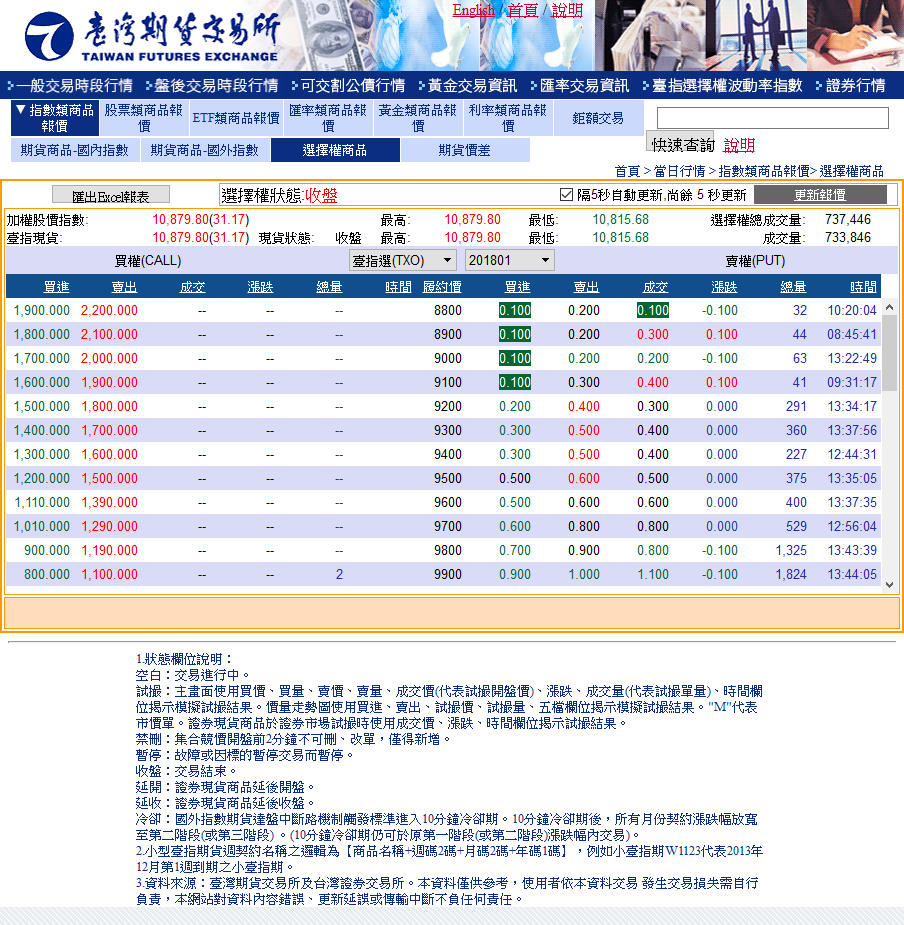

In [10]:
driver.save_screenshot('screen.png')
from IPython.display import Image
Image('screen.png')

In [11]:
#將Call資料與Put資料分別放到兩個dataframe裡面
soup = BeautifulSoup(driver.page_source,"lxml")
table = pd.read_html(str(soup.select('#divDG')[0]))[0]
Call = table.loc[:,:6]
Put = table.loc[:,6:]
Call.columns = Call.loc[0]
Call = Call[1:]
Put.columns = Put.loc[0]
Put = Put[1:]
display(Call.loc[15:20],Put.loc[15:20])

,買進,賣出,成交,漲跌,總量,時間,履約價
15,550.000,800.000,660.000,20.000,34,13:15:44,10200
16,560.000,570.000,570.000,30.000,60,13:32:20,10300
17,456.000,466.000,466.000,25.000,376,13:43:22,10400
18,358.000,367.000,368.000,22.000,952,13:44:51,10500
19,265.000,272.000,268.000,15.000,2249,13:44:34,10600
20,177.000,178.000,177.000,10.000,6648,13:44:41,10700


,履約價,買進,賣出,成交,漲跌,總量,時間
15,10200,1.600,1.800,1.800,-0.500,5755,13:44:20
16,10300,2.200,2.400,2.300,-0.800,5373,13:44:19
17,10400,3.100,3.200,3.200,-1.600,11673,13:44:47
18,10500,5.300,5.400,5.300,-2.700,10333,13:44:56
19,10600,9.800,10.000,9.800,-4.200,21194,13:44:55
20,10700,20.500,21.000,20.500,-7.000,19590,13:44:43


In [12]:
def Vol_conversion(input_ele):
    if input_ele == '--':
        return 0
    if input_ele!= '--':
        return int(''.join(input_ele.split(',')))
def mon_float(input_ele):
    if input_ele == '--':
        return None
    if input_ele!= '--':
        return float(''.join(input_ele.split(',')))

In [13]:
display(Call.head(3))
Call['總量'] = Call['總量'].map(Vol_conversion)
Put['總量'] = Put['總量'].map(Vol_conversion)
Call['成交'] = Call['成交'].map(mon_float)
Put['成交'] = Put['成交'].map(mon_float)
Call['履約價']=Call['履約價'].map(lambda x:int(x))
Put['履約價']=Put['履約價'].map(lambda x:int(x))
display(Call.head(3))

,買進,賣出,成交,漲跌,總量,時間,履約價
1,1900.000,2200.000,--,--,--,NaN,8800
2,1800.000,2100.000,--,--,--,NaN,8900
3,1700.000,2000.000,--,--,--,NaN,9000


,買進,賣出,成交,漲跌,總量,時間,履約價
1,1900.000,2200.000,NaN,--,0,NaN,8800
2,1800.000,2100.000,NaN,--,0,NaN,8900
3,1700.000,2000.000,NaN,--,0,NaN,9000


In [14]:
comp = np.array(Call['履約價'].tolist())+np.array(Call['成交'].tolist())-np.array(Put['成交'].tolist())
Call['組合價'] = pd.Series(comp,index=[Call.index])
Put['組合價'] = pd.Series(comp,index=[Put.index])
pd.Series(comp,index=[Call.index])

1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13    10813.7
14    10858.7
15    10858.2
16    10867.7
17    10862.8
18    10862.7
19    10858.2
20    10856.5
21    10857.0
22    10857.0
23    10857.5
24    10860.7
25    10864.6
26    10855.7
27        NaN
28        NaN
29        NaN
30    10865.2
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
36        NaN
37        NaN
38        NaN
dtype: float64

In [15]:
def EV(Spot_price,Strike_price):
    if Spot_price-Strike_price>0:
        return Spot_price-Strike_price
    else:
        return 0

In [16]:
Call['內含價值'] = Call.apply(lambda row: EV(row['組合價'],row['履約價']),axis=1)
Put['內含價值'] = Put.apply(lambda row: EV(row['組合價'],row['履約價']),axis=1)
display(Call.loc[16:19],Put.loc[16:19])

,買進,賣出,成交,漲跌,總量,時間,履約價,組合價,內含價值
16,560.000,570.000,570.0,30.000,60,13:32:20,10300,10867.7,567.7
17,456.000,466.000,466.0,25.000,376,13:43:22,10400,10862.8,462.8
18,358.000,367.000,368.0,22.000,952,13:44:51,10500,10862.7,362.7
19,265.000,272.000,268.0,15.000,2249,13:44:34,10600,10858.2,258.2


,履約價,買進,賣出,成交,漲跌,總量,時間,組合價,內含價值
16,10300,2.200,2.400,2.3,-0.800,5373,13:44:19,10867.7,567.7
17,10400,3.100,3.200,3.2,-1.600,11673,13:44:47,10862.8,462.8
18,10500,5.300,5.400,5.3,-2.700,10333,13:44:56,10862.7,362.7
19,10600,9.800,10.000,9.8,-4.200,21194,13:44:55,10858.2,258.2


In [17]:
Call['時間價值'] = Call.apply(lambda row: row['成交']-row['內含價值'] if row['成交']!= 0 else 0,axis=1)
Put['時間價值'] = Put.apply(lambda row: row['成交']-row['內含價值'] if row['成交']!= 0 else 0,axis=1)
display(Call.loc[10:20],Put.loc[10:20])

,買進,賣出,成交,漲跌,總量,時間,履約價,組合價,內含價值,時間價值
10,1010.000,1290.000,NaN,--,0,NaN,9700,NaN,0.0,NaN
11,900.000,1190.000,NaN,--,0,NaN,9800,NaN,0.0,NaN
12,800.000,1100.000,NaN,--,2,NaN,9900,NaN,0.0,NaN
13,750.000,1000.000,815.0,-25.000,4,10:12:01,10000,10813.7,813.7,1.3
14,600.000,900.000,760.0,20.000,54,13:15:41,10100,10858.7,758.7,1.3
15,550.000,800.000,660.0,20.000,34,13:15:44,10200,10858.2,658.2,1.8
16,560.000,570.000,570.0,30.000,60,13:32:20,10300,10867.7,567.7,2.3
17,456.000,466.000,466.0,25.000,376,13:43:22,10400,10862.8,462.8,3.2
18,358.000,367.000,368.0,22.000,952,13:44:51,10500,10862.7,362.7,5.3
19,265.000,272.000,268.0,15.000,2249,13:44:34,10600,10858.2,258.2,9.8


,履約價,買進,賣出,成交,漲跌,總量,時間,組合價,內含價值,時間價值
10,9700,0.600,0.800,0.8,0.000,529,12:56:04,NaN,0.0,0.8
11,9800,0.700,0.900,0.8,-0.100,1325,13:43:39,NaN,0.0,0.8
12,9900,0.900,1.000,1.1,-0.100,1824,13:44:05,NaN,0.0,1.1
13,10000,1.100,1.300,1.3,-0.100,6023,13:43:31,10813.7,813.7,-812.4
14,10100,1.300,1.500,1.3,-0.200,2177,13:44:58,10858.7,758.7,-757.4
15,10200,1.600,1.800,1.8,-0.500,5755,13:44:20,10858.2,658.2,-656.4
16,10300,2.200,2.400,2.3,-0.800,5373,13:44:19,10867.7,567.7,-565.4
17,10400,3.100,3.200,3.2,-1.600,11673,13:44:47,10862.8,462.8,-459.6
18,10500,5.300,5.400,5.3,-2.700,10333,13:44:56,10862.7,362.7,-357.4
19,10600,9.800,10.000,9.8,-4.200,21194,13:44:55,10858.2,258.2,-248.4


## 保證金算法

In [18]:
driver.get('http://info512.taifex.com.tw/Future/FusaQuote_Norl.aspx?d=080585')

In [19]:
#先抓出現貨價格
soup = BeautifulSoup(driver.page_source,'lxml')
pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[0:0]

,商品,狀態,買價,買量,賣價,賣量,成交價,漲跌,振幅％,成交量,開盤,最高,最低,參考價,時間
0,臺指現貨,收盤,NaN,--,NaN,--,10879.80,31.17,0.59,--,10856.92,10879.8,10815.68,10848.63,13:31:09


In [20]:
Spot_information = pd.read_html(str(soup.select('#divDG')[0]),header=0)[0].loc[0:0]

In [21]:
#給定期交所上的保證金A值以及B值
#賣出買權/賣出CALL : 權利金市值+MAXIMUM(A值-價外值，B值)
#賣出賣權/賣出PUT : 權利金市值+MAXIMUM(A值-價外值，B值)
A = 22000
B = 11000
S = float(Spot_information['成交價'])
spread1 = S-Call['履約價']
spread2 = Put['履約價']-S

In [22]:
Call["價外值"]=np.nan
for i in range(1,len(Call)):
    if spread1[i] > 0:
        Call["價外值"][i] = spread1[i] 
    else:
        Call["價外值"][i] = 0

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
Call['保證金']=np.nan
for i in range (1,len(Call)):
    Call['保證金'][i] = Call['成交'][i]*50 + max(A-Call["價外值"][i],B)

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
Put["價外值"]=np.nan
for i in range(1,len(Put)):
    if spread2[i] > 0:
        Put["價外值"][i] = spread2[i] 
    else:
        Put["價外值"][i] = 0

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [25]:
Put['保證金']=np.nan
for i in range (1,len(Put)):
    Put['保證金'][i] = Put['成交'][i]*50 + max(A-Put["價外值"][i],B)

C:\Users\ericlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
#看看價平附近Call跟Put情況如何
display(Call.loc[15:25],Put.loc[15:25])

,買進,賣出,成交,漲跌,總量,時間,履約價,組合價,內含價值,時間價值,價外值,保證金
15,550.000,800.000,660.0,20.000,34,13:15:44,10200,10858.2,658.2,1.8,679.8,54320.2
16,560.000,570.000,570.0,30.000,60,13:32:20,10300,10867.7,567.7,2.3,579.8,49920.2
17,456.000,466.000,466.0,25.000,376,13:43:22,10400,10862.8,462.8,3.2,479.8,44820.2
18,358.000,367.000,368.0,22.000,952,13:44:51,10500,10862.7,362.7,5.3,379.8,40020.2
19,265.000,272.000,268.0,15.000,2249,13:44:34,10600,10858.2,258.2,9.8,279.8,35120.2
20,177.000,178.000,177.0,10.000,6648,13:44:41,10700,10856.5,156.5,20.5,179.8,30670.2
21,101.000,102.000,101.0,6.000,16837,13:44:59,10800,10857.0,57.0,44.0,79.8,26970.2
22,46.000,46.500,46.0,2.000,29287,13:44:56,10900,10857.0,0.0,46.0,0.0,24300.0
23,16.000,16.500,16.5,0.000,16968,13:44:57,11000,10857.5,0.0,16.5,0.0,22825.0
24,4.400,4.800,4.7,-0.400,10535,13:44:58,11100,10860.7,0.0,4.7,0.0,22235.0


,履約價,買進,賣出,成交,漲跌,總量,時間,組合價,內含價值,時間價值,價外值,保證金
15,10200,1.600,1.800,1.8,-0.500,5755,13:44:20,10858.2,658.2,-656.4,0.0,22090.0
16,10300,2.200,2.400,2.3,-0.800,5373,13:44:19,10867.7,567.7,-565.4,0.0,22115.0
17,10400,3.100,3.200,3.2,-1.600,11673,13:44:47,10862.8,462.8,-459.6,0.0,22160.0
18,10500,5.300,5.400,5.3,-2.700,10333,13:44:56,10862.7,362.7,-357.4,0.0,22265.0
19,10600,9.800,10.000,9.8,-4.200,21194,13:44:55,10858.2,258.2,-248.4,0.0,22490.0
20,10700,20.500,21.000,20.5,-7.000,19590,13:44:43,10856.5,156.5,-136.0,0.0,23025.0
21,10800,44.000,44.500,44.0,-11.000,22767,13:44:51,10857.0,57.0,-13.0,0.0,24200.0
22,10900,89.000,91.000,89.0,-16.000,12007,13:44:56,10857.0,0.0,89.0,20.2,26429.8
23,11000,155.000,161.000,159.0,-19.000,992,13:44:44,10857.5,0.0,159.0,120.2,29829.8
24,11100,246.000,251.000,244.0,-23.000,84,13:41:18,10860.7,0.0,244.0,220.2,33979.8


## 如何計算價平

In [27]:
at_the_money = Call['履約價'] + Call['成交'] - Put['成交']

In [28]:
difference = at_the_money - Call['履約價']

In [29]:
df = pd.concat([at_the_money,Call['履約價'],Call['成交'],Call['保證金'],Put['成交'],Put['保證金']],axis = 1)
display(df[12:25])

,0,履約價,成交,保證金,成交,保證金
13,10813.7,10000,815.0,61870.2,1.3,22065.0
14,10858.7,10100,760.0,59220.2,1.3,22065.0
15,10858.2,10200,660.0,54320.2,1.8,22090.0
16,10867.7,10300,570.0,49920.2,2.3,22115.0
17,10862.8,10400,466.0,44820.2,3.2,22160.0
18,10862.7,10500,368.0,40020.2,5.3,22265.0
19,10858.2,10600,268.0,35120.2,9.8,22490.0
20,10856.5,10700,177.0,30670.2,20.5,23025.0
21,10857.0,10800,101.0,26970.2,44.0,24200.0
22,10857.0,10900,46.0,24300.0,89.0,26429.8


In [30]:
df.columns= ['K+C-P', 'Exercise_Price', 'Premium_Call', 'Margin_Call', 'Premium_Put', 'Margin_Put']
df[13:26]

,K+C-P,Exercise_Price,Premium_Call,Margin_Call,Premium_Put,Margin_Put
14,10858.7,10100,760.0,59220.2,1.3,22065.0
15,10858.2,10200,660.0,54320.2,1.8,22090.0
16,10867.7,10300,570.0,49920.2,2.3,22115.0
17,10862.8,10400,466.0,44820.2,3.2,22160.0
18,10862.7,10500,368.0,40020.2,5.3,22265.0
19,10858.2,10600,268.0,35120.2,9.8,22490.0
20,10856.5,10700,177.0,30670.2,20.5,23025.0
21,10857.0,10800,101.0,26970.2,44.0,24200.0
22,10857.0,10900,46.0,24300.0,89.0,26429.8
23,10857.5,11000,16.5,22825.0,159.0,29829.8
